In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# CALCUl 2 score quantil

In [28]:
#from sklearn.preprocessing import QuantileTransformer

#qt = QuantileTransformer(output_distribution='uniform')
#df['popularity_score'] = qt.fit_transform(df[['popularity']]) * 10

## Def genre colonnes

In [35]:
# Définir les colonnes de genres à exclure
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
    'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
    'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western'
]



## Ajout colonne Release year et months

In [36]:
# Extraire l'année et le mois de sortie du film
#if 'release_date' in df.columns:
    df['release_year'] = pd.to_datetime(df['release_date'], errors='coerce').dt.year
    df['release_month'] = pd.to_datetime(df['release_date'], errors='coerce').dt.month

NameError: name 'df' is not defined

## CALCUL 3 bayesien

In [32]:
# c = mean vote across dataset
# m = minimum votes required
# v = vote count, R = vote average
c = df['vote_average'].mean()
m = df['vote_count'].quantile(0.50)
df['popularity_score'] = (
    (df['vote_count'] / (df['vote_count'] + m)) * df['vote_average'] +
    (m / (df['vote_count'] + m)) * c
)

In [37]:
import requests
import time

# DATASET OFFICIEL

In [38]:
df1 = pd.read_csv('df_ML3.csv')
df1

,id,title,release_date,genres,language,popularity,vote_count,vote_average,overview,genre_names,...,Thriller,War,Western,release_year,release_month,budget,revenue,runtime,production_companies,production_countries
0,1197306,A Working Man,2025-03-26,"[28, 80, 53]",en,633.0389,480.0,6.385,Levon Cade left behind a decorated military ca...,"['Action', 'Crime', 'Thriller']",...,1,0,0,2025.0,3.0,40000000.0,89722806.0,116.0,"['Cedar Park Entertainment', 'BlockFilm', 'Pun...","['GB', 'US']"
1,668489,Havoc,2025-04-24,"[28, 80, 53]",en,580.3429,281.0,6.600,When a drug heist swerves lethally out of cont...,"['Action', 'Crime', 'Thriller']",...,1,0,0,2025.0,4.0,90000000.0,0.0,107.0,"['XYZ Films', 'Severn Screen', 'One More One P...","['GB', 'US']"
2,950387,A Minecraft Movie,2025-03-31,"[10751, 35, 12, 14]",en,423.6209,752.0,6.200,Four misfits find themselves struggling with o...,"['Family', 'Comedy', 'Adventure', 'Fantasy']",...,0,0,0,2025.0,3.0,150000000.0,874636560.0,101.0,"['Warner Bros. Pictures', 'Legendary Pictures'...","['SE', 'US']"
3,324544,In the Lost Lands,2025-02-27,"[14, 12, 28]",en,307.5934,294.0,6.300,A queen sends the powerful and feared sorceres...,"['Fantasy', 'Adventure', 'Action']",...,0,0,0,2025.0,2.0,55000000.0,4755330.0,102.0,"['Constantin Film', 'Spark Productions']","['DE', 'CH']"
4,822119,Captain America: Brave New World,2025-02-12,"[28, 53, 878]",en,253.9094,1663.0,6.154,After meeting with newly elected U.S. Presiden...,"['Action', 'Thriller', 'Science Fiction']",...,1,0,0,2025.0,2.0,180000000.0,414757293.0,119.0,"['Marvel Studios', 'Kevin Feige Productions']",['US']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2302,60935,The Thing,2011-10-12,"[27, 878, 9648]",en,7.7850,2989.0,6.225,When paleontologist Kate Lloyd travels to an i...,"['Horror', 'Science Fiction', 'Mystery']",...,0,0,0,2011.0,10.0,35000000.0,31505287.0,103.0,"['Universal Pictures', 'Morgan Creek Entertain...",['US']
2303,1047373,The Silent Hour,2024-10-03,"[80, 53, 28]",en,5.9119,191.0,6.563,"While working a case as an interpreter, a hear...","['Crime', 'Thriller', 'Action']",...,1,0,0,2024.0,10.0,0.0,322064.0,99.0,"['AGC Studios', 'Meridian Pictures', 'Orogen E...","['US', 'MT']"
2304,9415,Murder at 1600,1997-04-18,"[28, 18, 9648, 53, 80]",en,8.6223,542.0,6.100,A secretary is found dead in a White House bat...,"['Action', 'Drama', 'Mystery', 'Thriller', 'Cr...",...,1,0,0,1997.0,4.0,40000000.0,25804707.0,107.0,"['Kopelson Entertainment', 'Regency Enterprise...",['US']
2305,9884,Collateral Damage,2002-02-06,"[28, 53, 18]",en,7.9877,1396.0,5.760,Firefighter Gordon Brewer is plunged into the ...,"['Action', 'Thriller', 'Drama']",...,1,0,0,2002.0,2.0,85000000.0,78382433.0,108.0,"['David Foster Productions', 'Hacienda Product...",['US']


In [39]:
df1.columns

Index(['id', 'title', 'release_date', 'genres', 'language', 'popularity',
       'vote_count', 'vote_average', 'overview', 'genre_names', 'genres_str',
       'popularity_score', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'release_year', 'release_month', 'budget',
       'revenue', 'runtime', 'production_companies', 'production_countries'],
      dtype='object')

## AJOUT COLONNE PROFIT

In [40]:
# Créer une colonne bénéfice (profit), sauf si budget ou revenue est 0
mask_valid = (df1['budget'] > 0) & (df1['revenue'] > 0)
df1['profit'] = 0
df1.loc[mask_valid, 'profit'] = df1.loc[mask_valid, 'revenue'] - df1.loc[mask_valid, 'budget']


In [41]:
df1.columns

Index(['id', 'title', 'release_date', 'genres', 'language', 'popularity',
       'vote_count', 'vote_average', 'overview', 'genre_names', 'genres_str',
       'popularity_score', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'release_year', 'release_month', 'budget',
       'revenue', 'runtime', 'production_companies', 'production_countries',
       'profit'],
      dtype='object')

## Ajout colonnes prod_company 1 et 2

In [42]:


# Extraire les deux premières compagnies de production
def extract_first_two(lst):
    if isinstance(lst, str):
        try:
            parsed = eval(lst)
            return parsed[:2] + [None] * (2 - len(parsed))
        except:
            return [None, None]
    return [None, None]

company_cols = df1['production_companies'].apply(extract_first_two)
df1['prod_company_1'] = company_cols.apply(lambda x: x[0])
df1['prod_company_2'] = company_cols.apply(lambda x: x[1])

In [43]:
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
le2 = LabelEncoder()

df1['prod_company_1_encoded'] = le1.fit_transform(df1['prod_company_1'].astype(str))
df1['prod_company_2_encoded'] = le2.fit_transform(df1['prod_company_2'].astype(str))


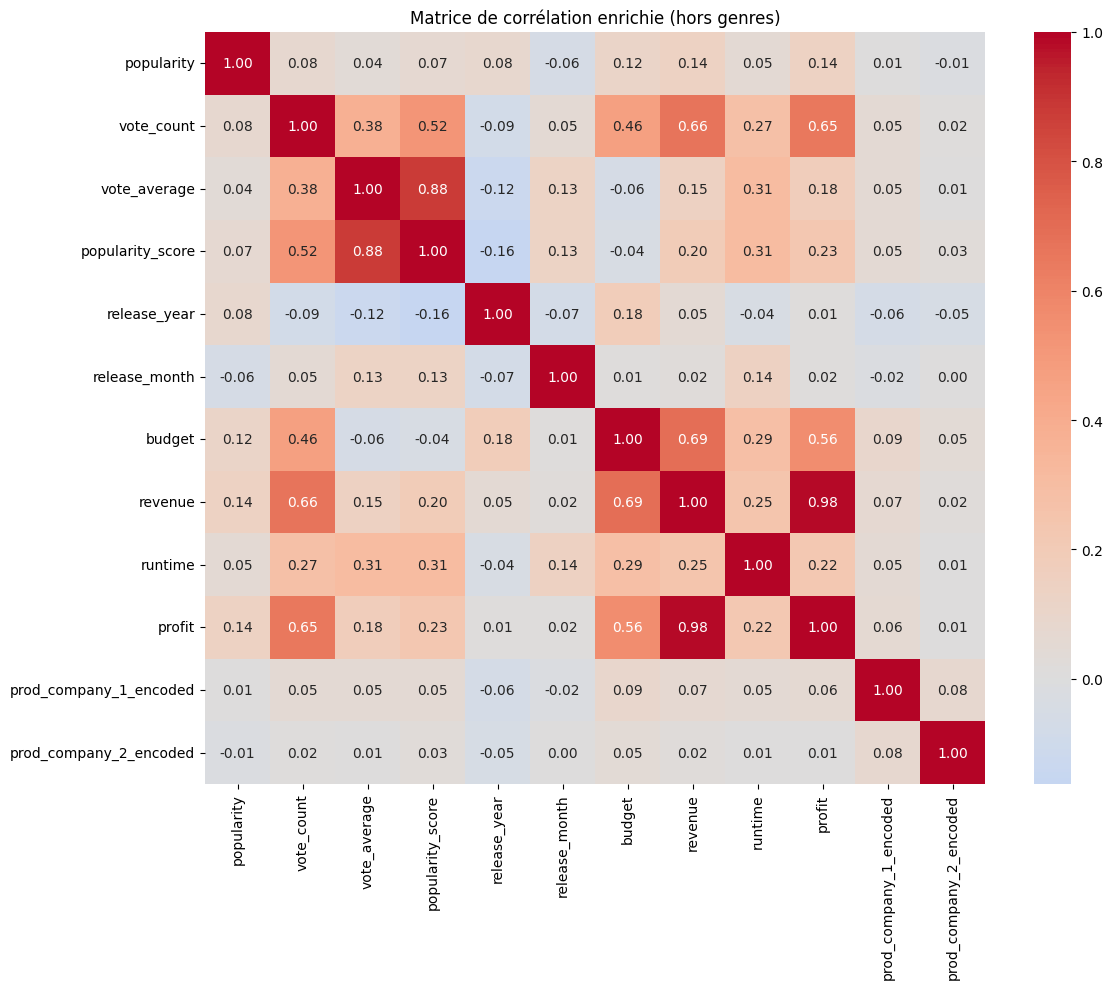

In [44]:
# Garde toutes les colonnes numériques sauf celles des genres et overview_length
numerical_cols = df1.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in genre_cols and col != 'overview_length']

# Matrice de corrélation
correlation_matrix = df1[numerical_cols].corr()

# Affichage de la heatmap centrée sur 0
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title("Matrice de corrélation enrichie (hors genres)")
plt.tight_layout()
plt.show()


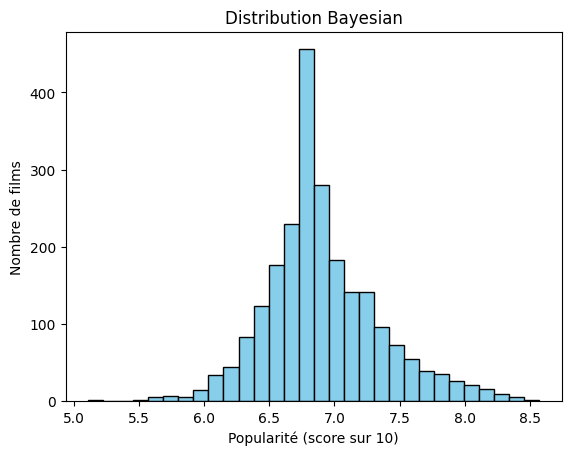

In [104]:
import matplotlib.pyplot as plt

plt.hist(df1['popularity_score'], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution Bayesian")
plt.xlabel("Popularité (score sur 10)")
plt.ylabel("Nombre de films")
plt.show()




In [82]:
# Recalcule un score de popularité standardisé entre 0 et 10
min_pop = df1['popularity'].min()
max_pop = df1['popularity'].max()
min_pop2 = df1['popularity_score'].min()
max_pop2 = df1['popularity_score'].max()

print ( min_pop,min_pop2,max_pop,max_pop2)


5.6601 5.1120656880993955 633.0389 8.568599098424333


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import requests
import time
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [47]:
df1['popularity_score'].isna().sum()

1

In [48]:
df1 = df1.dropna(subset=['popularity_score']).reset_index(drop=True)

## Essais 1 : overfitting

In [59]:
y = df1['popularity_score']
X = df1.drop(columns=['popularity_score', 'id', 'title', 'release_date', 'genres', 'language', 'overview', 'genre_names', 'prod_company_1', 'prod_company_2','vote_count', 'vote_average'] + genre_cols)

# Vérifier les types d'entrée valides pour le modèle
# Supprimer les colonnes contenant des types non-numériques restants, s'il y en a
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print("🔍 Colonnes non numériques supprimées :", non_numeric_cols)
    X = X.drop(columns=non_numeric_cols)

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n🎯 Évaluation du modèle Random Forest :")
print(f"- RMSE : {rmse:.3f}")
print(f"- R²    : {r2:.3f}")
print(f"- MAE   : {mae:.3f}")

🔍 Colonnes non numériques supprimées : ['genres_str', 'production_companies', 'production_countries']

🎯 Évaluation du modèle Random Forest :
- RMSE : 0.350
- R²    : 0.362
- MAE   : 0.255


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print(f"R² moyen en validation croisée : {np.mean(scores):.3f} ± {np.std(scores):.3f}")


R² moyen en validation croisée : 0.190 ± 0.075


In [72]:
X.columns

Index(['release_year', 'release_month', 'budget', 'revenue', 'runtime',
       'profit', 'prod_company_1_encoded', 'prod_company_2_encoded'],
      dtype='object')

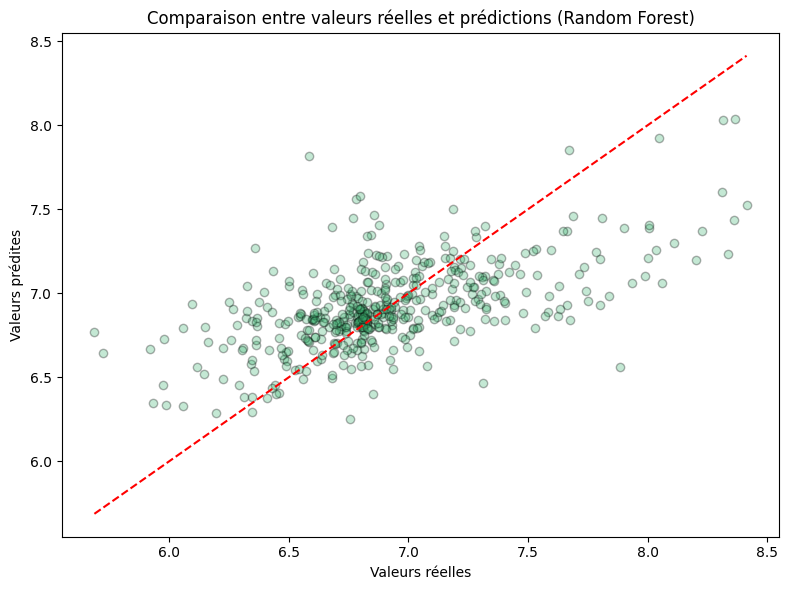

In [61]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='mediumseagreen', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre valeurs réelles et prédictions (Random Forest)")
plt.tight_layout()
plt.show()


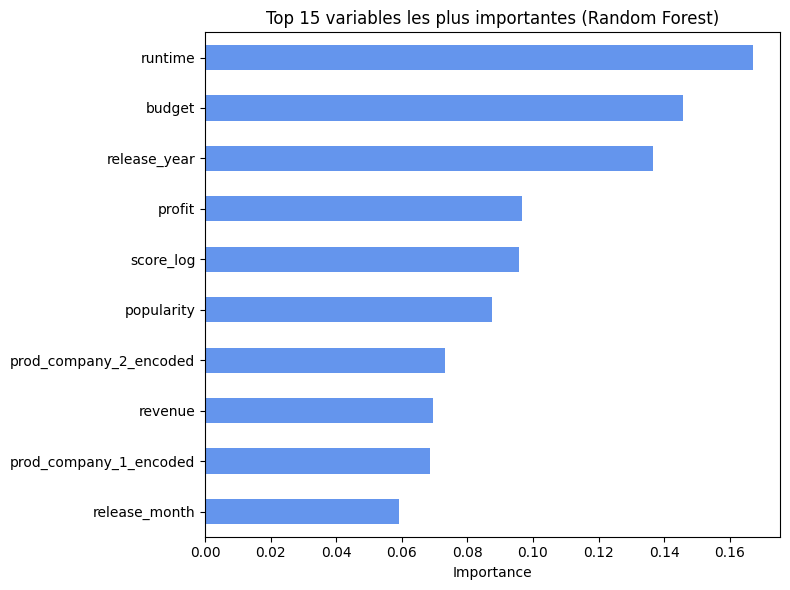

In [62]:
importances = model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)
feat_importances.nlargest(15).plot(kind='barh', figsize=(8, 6), color='cornflowerblue')
plt.title("Top 15 variables les plus importantes (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


## Essais 2 : sans variable influante

In [52]:
#X_reduced = X.drop(columns=['vote_count', 'vote_average'])
#X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

#model_r = RandomForestRegressor(random_state=42)
#model_r.fit(X_train_r, y_train_r)
#y_pred_r = model_r.predict(X_test_r)

#print("R² sans variables les plus corrélées :", r2_score(y_test_r, y_pred_r))


R² sans variables les plus corrélées : 0.35775176561221456


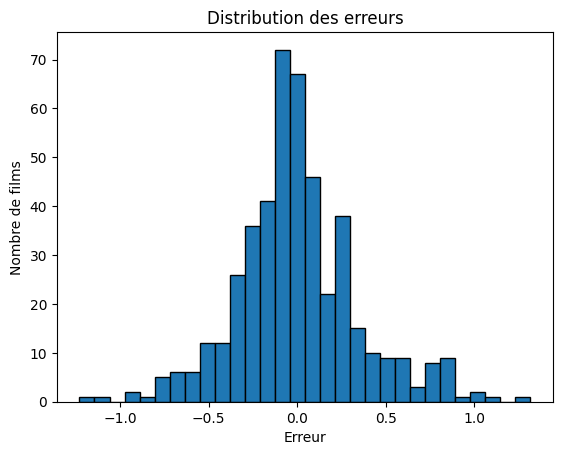

In [63]:
errors = y_test - y_pred
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Distribution des erreurs")
plt.xlabel("Erreur")
plt.ylabel("Nombre de films")
plt.show()


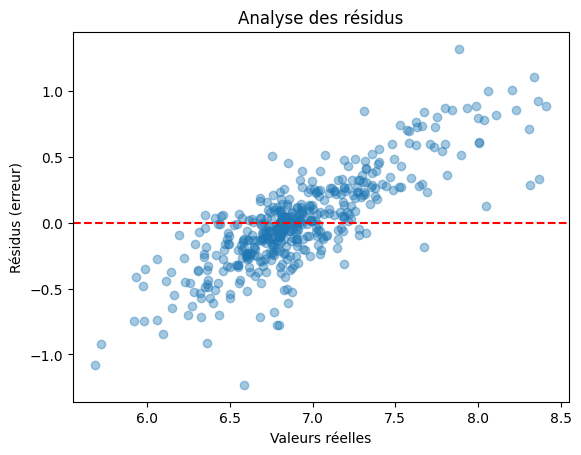

In [64]:
plt.scatter(y_test, y_test - y_pred, alpha=0.4)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus (erreur)")
plt.title("Analyse des résidus")
plt.show()


## ESSAIS FINAL

In [97]:
#log_pop = np.log1p(df1['popularity'])
#df1['score_log'] = (log_pop - log_pop.min()) / (log_pop.max() - log_pop.min()) * 10

# Définir X et y

y = df1['popularity_score']
X = df1.drop(columns=['score_log','popularity','popularity_score', 'id', 'title', 'release_date', 'genres', 'language', 'overview', 'genre_names', 'prod_company_1', 'prod_company_2','vote_count', 'vote_average'] )

# Vérifier les types d'entrée valides pour le modèle
# Supprimer les colonnes contenant des types non-numériques restants, s'il y en a
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print("🔍 Colonnes non numériques supprimées :", non_numeric_cols)
    X = X.drop(columns=non_numeric_cols)

# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n🎯 Évaluation du modèle Random Forest :")
print(f"- RMSE : {rmse:.3f}")
print(f"- R²    : {r2:.3f}")
print(f"- MAE   : {mae:.3f}")

🔍 Colonnes non numériques supprimées : ['genres_str', 'production_companies', 'production_countries']

🎯 Évaluation du modèle Random Forest :
- RMSE : 0.338
- R²    : 0.403
- MAE   : 0.249


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [98]:
X.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery',
       'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western',
       'release_year', 'release_month', 'budget', 'revenue', 'runtime',
       'profit', 'prod_company_1_encoded', 'prod_company_2_encoded'],
      dtype='object')

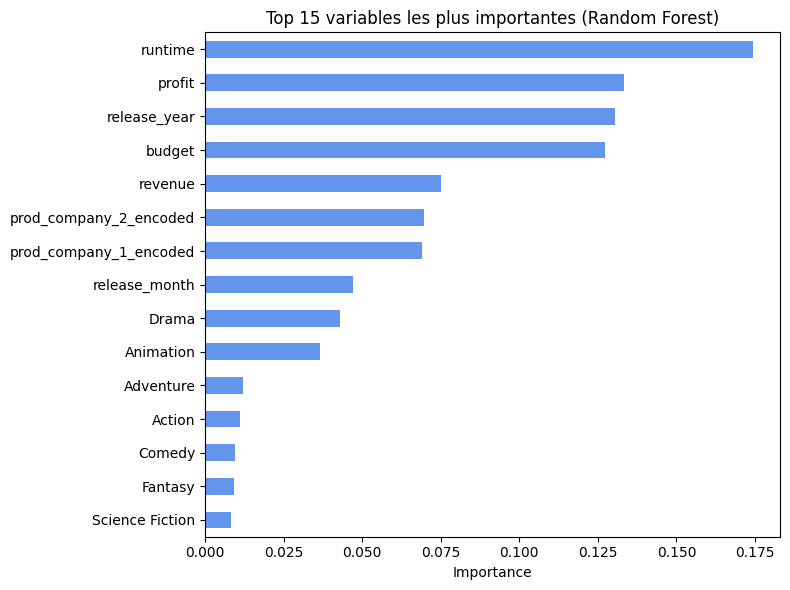

In [99]:
importances = model.feature_importances_
feature_names = X.columns
feat_importances = pd.Series(importances, index=feature_names)

plt.figure(figsize=(8, 6))
feat_importances.nlargest(15).plot(kind='barh', color='cornflowerblue')
plt.title("Top 15 variables les plus importantes (Random Forest)")
plt.xlabel("Importance")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


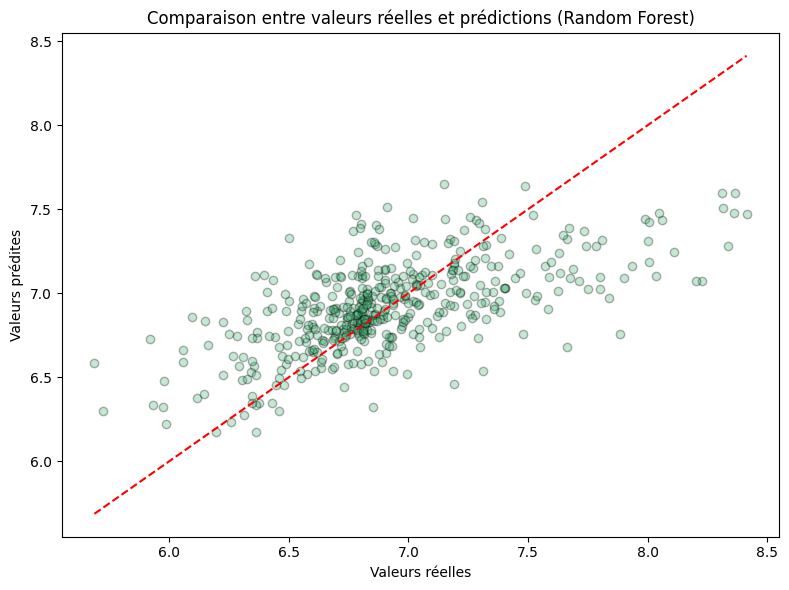

In [100]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, color='mediumseagreen', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red')
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.title("Comparaison entre valeurs réelles et prédictions (Random Forest)")
plt.tight_layout()
plt.show()

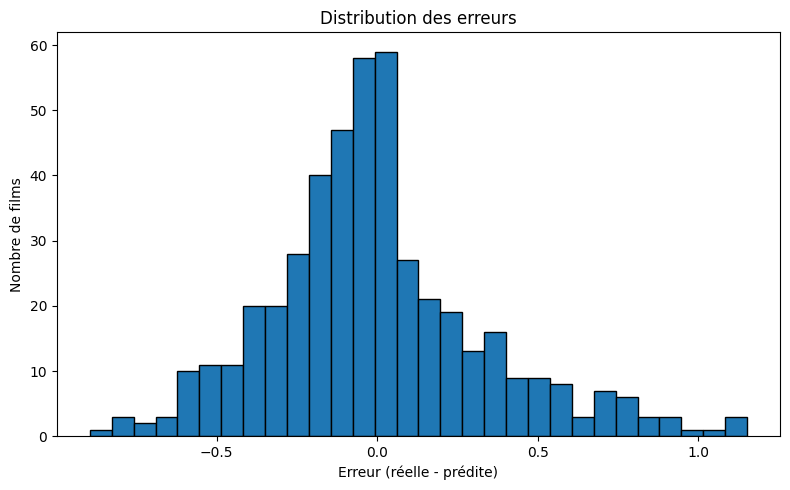

In [101]:
errors = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Distribution des erreurs")
plt.xlabel("Erreur (réelle - prédite)")
plt.ylabel("Nombre de films")
plt.tight_layout()
plt.show()

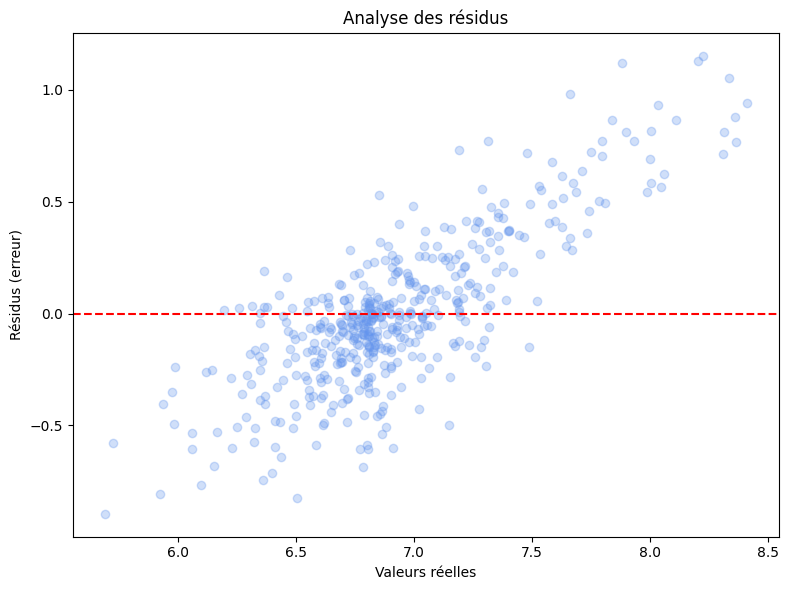

In [102]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, errors, alpha=0.3, color='cornflowerblue')
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus (erreur)")
plt.title("Analyse des résidus")
plt.tight_layout()
plt.show()


In [103]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
y = df1['popularity_score']
X = df1.drop(columns=['score_log','popularity','popularity_score', 'id', 'title', 'release_date', 'genres', 'language', 'overview', 'genre_names', 'prod_company_1', 'prod_company_2','vote_count', 'vote_average'] )

# Vérifier les types d'entrée valides pour le modèle
# Supprimer les colonnes contenant des types non-numériques restants, s'il y en a
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
if non_numeric_cols:
    print("🔍 Colonnes non numériques supprimées :", non_numeric_cols)
    X = X.drop(columns=non_numeric_cols)

# Définir les hyperparamètres
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Recherche d'hyperparamètres
model = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    model, param_distributions, n_iter=50, cv=5, scoring='r2', random_state=42, n_jobs=-1
)
search.fit(X, y)

# Résultats
print("✅ Meilleurs paramètres :", search.best_params_)
print("🎯 Score R² moyen :", search.best_score_)
print(f"- MAE   : {mae:.3f}")
print(f"- RMSE : {rmse:.3f}")

🔍 Colonnes non numériques supprimées : ['genres_str', 'production_companies', 'production_countries']
✅ Meilleurs paramètres : {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20}
🎯 Score R² moyen : 0.25636103337164207
- MAE   : 0.249
- RMSE : 0.338


## Essais 3 = score log, sans variables influantes, sans genre cols

In [55]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# ✅ Création de la variable score_log (log de popularity normalisé)
log_pop = np.log1p(df1['popularity'])
df1['score_log'] = (log_pop - log_pop.min()) / (log_pop.max() - log_pop.min()) * 10

# Définir X et y
y = df1['score_log']
X = df1.drop(columns=[
    'popularity','popularity_score', 'id', 'title', 'release_date', 'genres', 'language', 
    'overview', 'genre_names', 'prod_company_1', 'prod_company_2', 
    'vote_count', 'vote_average','score_log'
] + genre_cols, errors='ignore')  # errors='ignore' évite les bugs si déjà supprimés

# Supprimer les colonnes non numériques
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
X = X.drop(columns=non_numeric)


# Séparer les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialiser et entraîner le modèle
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n🎯 Évaluation du modèle Random Forest :")
print(f"- RMSE : {rmse:.3f}")
print(f"- R²    : {r2:.3f}")
print(f"- MAE   : {mae:.3f}")


🎯 Évaluation du modèle Random Forest :
- RMSE : 0.916
- R²    : 0.169
- MAE   : 0.640


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [65]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

# ✅ Création de la variable score_log (log de popularity normalisé)
#log_pop = np.log1p(df1['popularity'])
#df1['score_log'] = (log_pop - log_pop.min()) / (log_pop.max() - log_pop.min()) * 10

# Définir X et y
y = df1['popularity_score']
X = df1.drop(columns=[
    'popularity','popularity_score', 'id', 'title', 'release_date', 'genres', 'language', 
    'overview', 'genre_names', 'prod_company_1', 'prod_company_2', 
    'vote_count', 'vote_average','score_log'
] + genre_cols, errors='ignore')  # errors='ignore' évite les bugs si déjà supprimés

# Supprimer les colonnes non numériques
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
X = X.drop(columns=non_numeric)

# Définir les hyperparamètres
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Recherche d'hyperparamètres
model = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    model, param_distributions, n_iter=50, cv=5, scoring='r2', random_state=42, n_jobs=-1
)
search.fit(X, y)

# Résultats
print("✅ Meilleurs paramètres :", search.best_params_)
print("🎯 Score R² moyen :", search.best_score_)



✅ Meilleurs paramètres : {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 10}
🎯 Score R² moyen : 0.15315446857438025


In [66]:
X.columns

Index(['release_year', 'release_month', 'budget', 'revenue', 'runtime',
       'profit', 'prod_company_1_encoded', 'prod_company_2_encoded'],
      dtype='object')

Text(0.5, 1.0, 'Prédictions vs Réalité (Random Forest)')

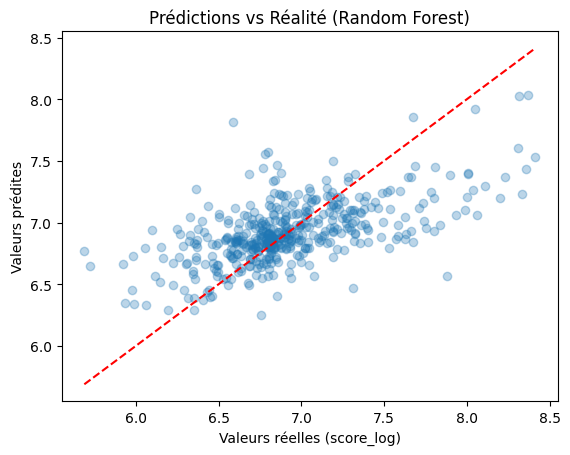

In [67]:
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Valeurs réelles (score_log)")
plt.ylabel("Valeurs prédites")
plt.title("Prédictions vs Réalité (Random Forest)")


Text(0, 0.5, 'Nombre de films')

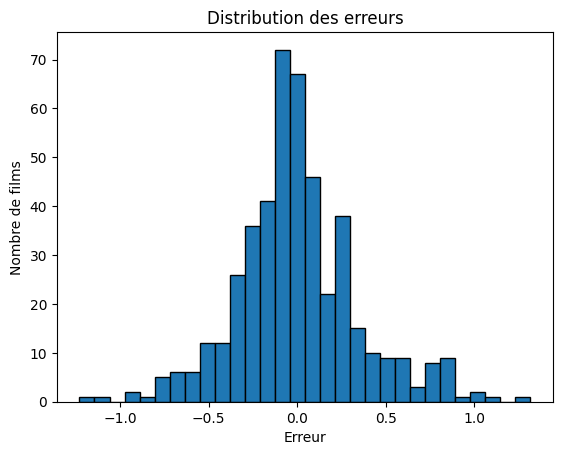

In [68]:
errors = y_test - y_pred
plt.hist(errors, bins=30, edgecolor='black')
plt.title("Distribution des erreurs")
plt.xlabel("Erreur")
plt.ylabel("Nombre de films")


Text(0, 0.5, 'Résidus (erreur)')

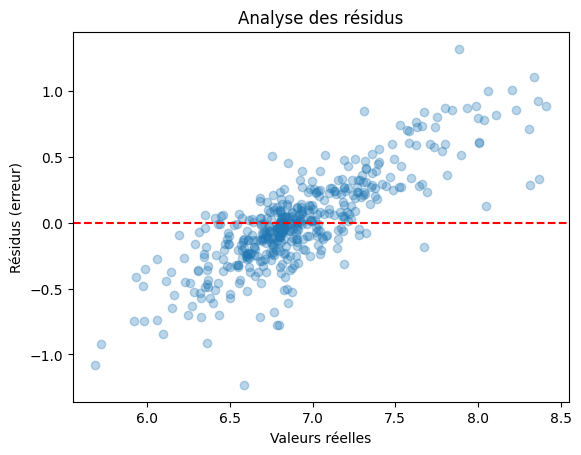

In [69]:
plt.scatter(y_test, errors, alpha=0.3)
plt.axhline(0, linestyle='--', color='red')
plt.title("Analyse des résidus")
plt.xlabel("Valeurs réelles")
plt.ylabel("Résidus (erreur)")


In [70]:
# Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Réentraîner le modèle avec les meilleurs hyperparamètres
best_model = search.best_estimator_
best_model.fit(X_train, y_train)

# Prédictions
y_pred = best_model.predict(X_test)

# Évaluation
r2_train = r2_score(y_train, best_model.predict(X_train))
r2_test = r2_score(y_test, y_pred)

print(f"Train R² : {r2_train:.3f}, Test R² : {r2_test:.3f}")


Train R² : 0.631, Test R² : 0.309


In [71]:
X.columns

Index(['release_year', 'release_month', 'budget', 'revenue', 'runtime',
       'profit', 'prod_company_1_encoded', 'prod_company_2_encoded'],
      dtype='object')

In [127]:
# ✅ Définir X et y
y = df1['score_log']  # ou 'popularity_score' si tu préfères
X = df1.drop(columns=[
    'popularity', 'popularity_score', 'score_log', 'id', 'title', 'release_date',
    'genres', 'language', 'overview', 'genre_names',
    'prod_company_1', 'prod_company_2',
    'vote_count', 'vote_average'
])

# ✅ Supprimer les colonnes non numériques restantes
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
X = X.drop(columns=non_numeric)

# ✅ Ajouter les colonnes de genre binaires
X = pd.concat([X, df1[genre_cols]], axis=1)

# ✅ Split des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ Entraînement du modèle
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# ✅ Prédictions
y_pred = model.predict(X_test)

# ✅ Évaluation
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"\n🎯 Évaluation du modèle Random Forest avec genres inclus :")
print(f"- RMSE : {rmse:.3f}")
print(f"- R²    : {r2:.3f}")
print(f"- MAE   : {mae:.3f}")



🎯 Évaluation du modèle Random Forest avec genres inclus :
- RMSE : 0.576
- R²    : -0.086
- MAE   : 0.324


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Essais 5 : ajout language

In [131]:
from sklearn.preprocessing import OneHotEncoder

# Encodage OneHot (version récente)
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_lang = ohe.fit_transform(df1[['language']])
encoded_lang_df = pd.DataFrame(encoded_lang, columns=ohe.get_feature_names_out(['language']))
encoded_lang_df.index = df1.index

# Remplacer la colonne
df1 = pd.concat([df1.drop(columns=['language']), encoded_lang_df], axis=1)

In [132]:
# Définir X et y
y = df1['score_log']
X = df1.drop(columns=[
    'popularity','popularity_score', 'id', 'title', 'release_date', 'genres', 
    'overview', 'genre_names', 'prod_company_1', 'prod_company_2', 
    'vote_count', 'vote_average'
] + genre_cols, errors='ignore')  # errors='ignore' évite les bugs si déjà supprimés

# Supprimer les colonnes non numériques
non_numeric = X.select_dtypes(exclude=[np.number]).columns.tolist()
X = X.drop(columns=non_numeric)

# Définir les hyperparamètres
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Recherche d'hyperparamètres
model = RandomForestRegressor(random_state=42)
search = RandomizedSearchCV(
    model, param_distributions, n_iter=50, cv=5, scoring='r2', random_state=42, n_jobs=-1
)
search.fit(X, y)

# Résultats
print("✅ Meilleurs paramètres :", search.best_params_)
print("🎯 Score R² moyen :", search.best_score_)

✅ Meilleurs paramètres : {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': None}
🎯 Score R² moyen : 0.7207093828126417


In [133]:
X.columns

Index(['release_year', 'release_month', 'budget', 'revenue', 'runtime',
       'profit', 'prod_company_1_encoded', 'prod_company_2_encoded',
       'score_log', 'language_cn', 'language_da', 'language_de', 'language_en',
       'language_es', 'language_fi', 'language_fr', 'language_hi',
       'language_hu', 'language_id', 'language_it', 'language_ja',
       'language_ko', 'language_lv', 'language_ml', 'language_nl',
       'language_no', 'language_pl', 'language_pt', 'language_ru',
       'language_sv', 'language_ta', 'language_te', 'language_th',
       'language_uk', 'language_ur', 'language_zh'],
      dtype='object')

In [134]:
# Supprimer toutes les colonnes commençant par 'language_'
language_cols = [col for col in df1.columns if col.startswith('language_')]
df1 = df1.drop(columns=language_cols)

# Si la colonne 'language' a été supprimée, la restaurer depuis le df original
# (à adapter si ton df initial s'appelle différemment)
df1['language'] = df['language']

# Vérification
print("✅ Colonnes 'language_' supprimées et 'language' restaurée.")
print(df1.columns)

✅ Colonnes 'language_' supprimées et 'language' restaurée.
Index(['id', 'title', 'release_date', 'genres', 'popularity', 'vote_count',
       'vote_average', 'overview', 'genre_names', 'genres_str',
       'popularity_score', 'Action', 'Adventure', 'Animation', 'Comedy',
       'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie',
       'Thriller', 'War', 'Western', 'release_year', 'release_month', 'budget',
       'revenue', 'runtime', 'production_companies', 'production_countries',
       'profit', 'prod_company_1', 'prod_company_2', 'prod_company_1_encoded',
       'prod_company_2_encoded', 'score_log', 'language'],
      dtype='object')
